In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hgmd.raw.matrix.csv", index_col = 0)
df['rowlabel'] = df['phenotype'] + ' (chr' + df['CHROM_hg19'].astype(str) + ':' + df['POS_hg19'].astype(str) + ')'
sub_df = df[df.columns[11:]]
sub_df.set_index('rowlabel', inplace=True)
df2 = sub_df.stack().reset_index().iloc[:, ::-1]
df2.columns = ['vals', 'profiles', 'phenotype']

<AxesSubplot:xlabel='phenotype', ylabel='vals'>

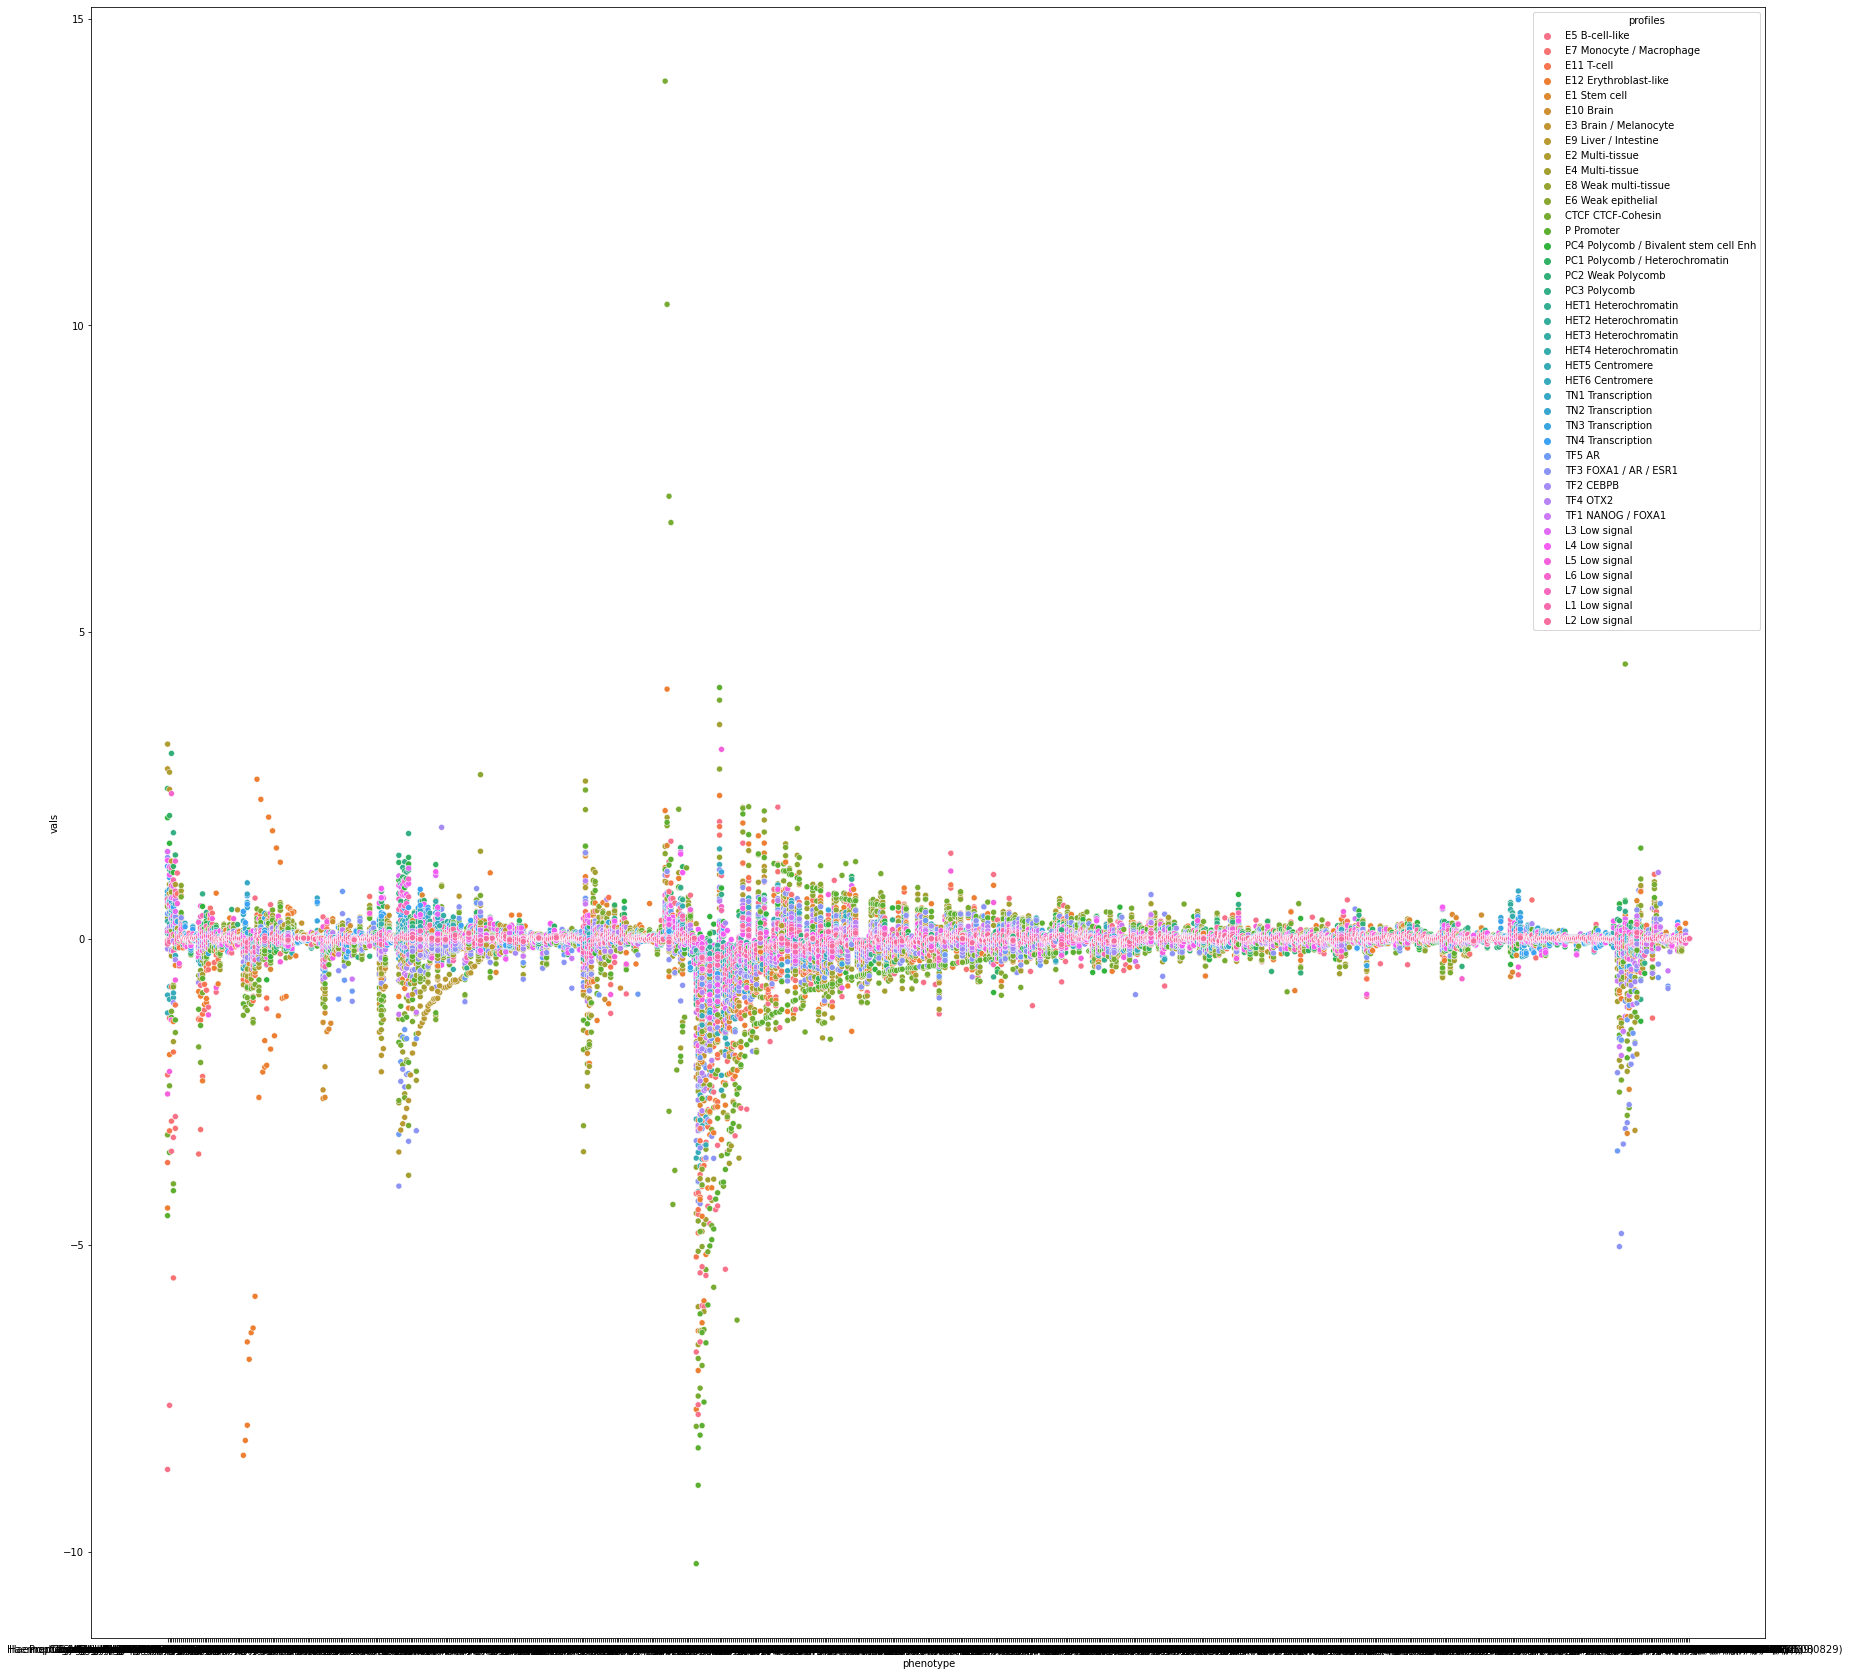

In [3]:
plt.figure(figsize=(30,30))
sb.scatterplot(data = df2, x = "phenotype", y = "vals", hue = 'profiles')

[(-5.0, 5.0)]

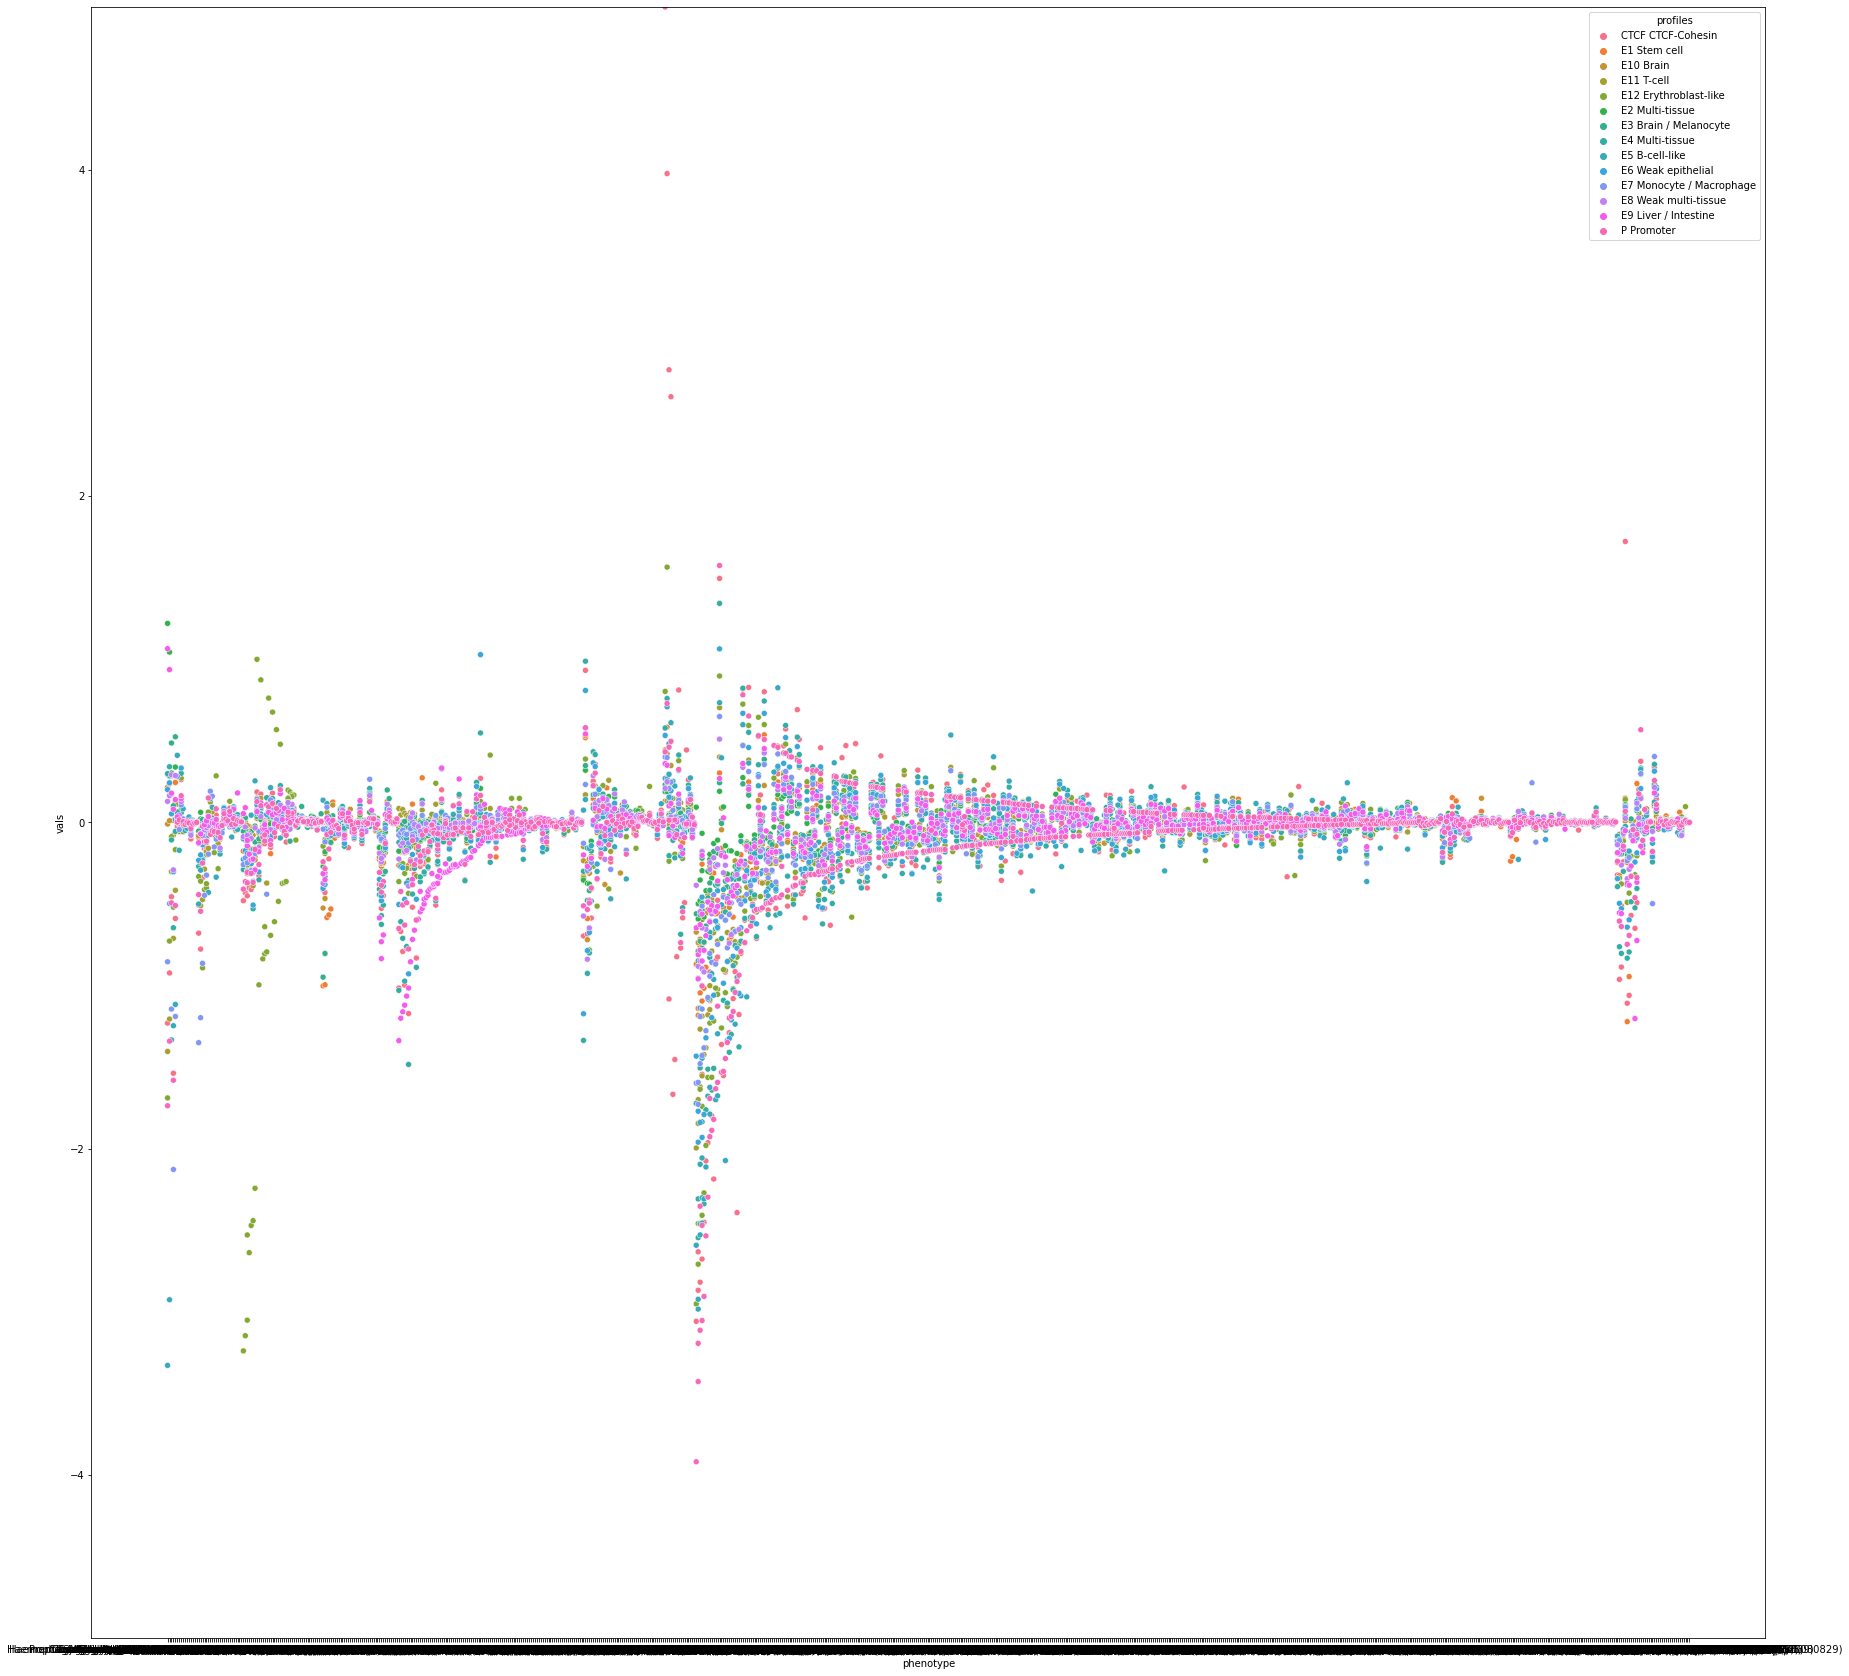

In [4]:
# Scatter Plot with only Enhancer, CTCF Cohesin, and Promoter sequence classes
cpe_df = pd.read_csv('ctcf_p_e.csv', index_col = 0)
cpe_df2 = cpe_df.dropna()
plt.figure(figsize=(30,30))
g = sb.scatterplot(data = cpe_df2, x = "phenotype", y = "vals", hue = 'profiles')
g.set(ylim = (-5, 5))

[(-5.0, 5.0)]

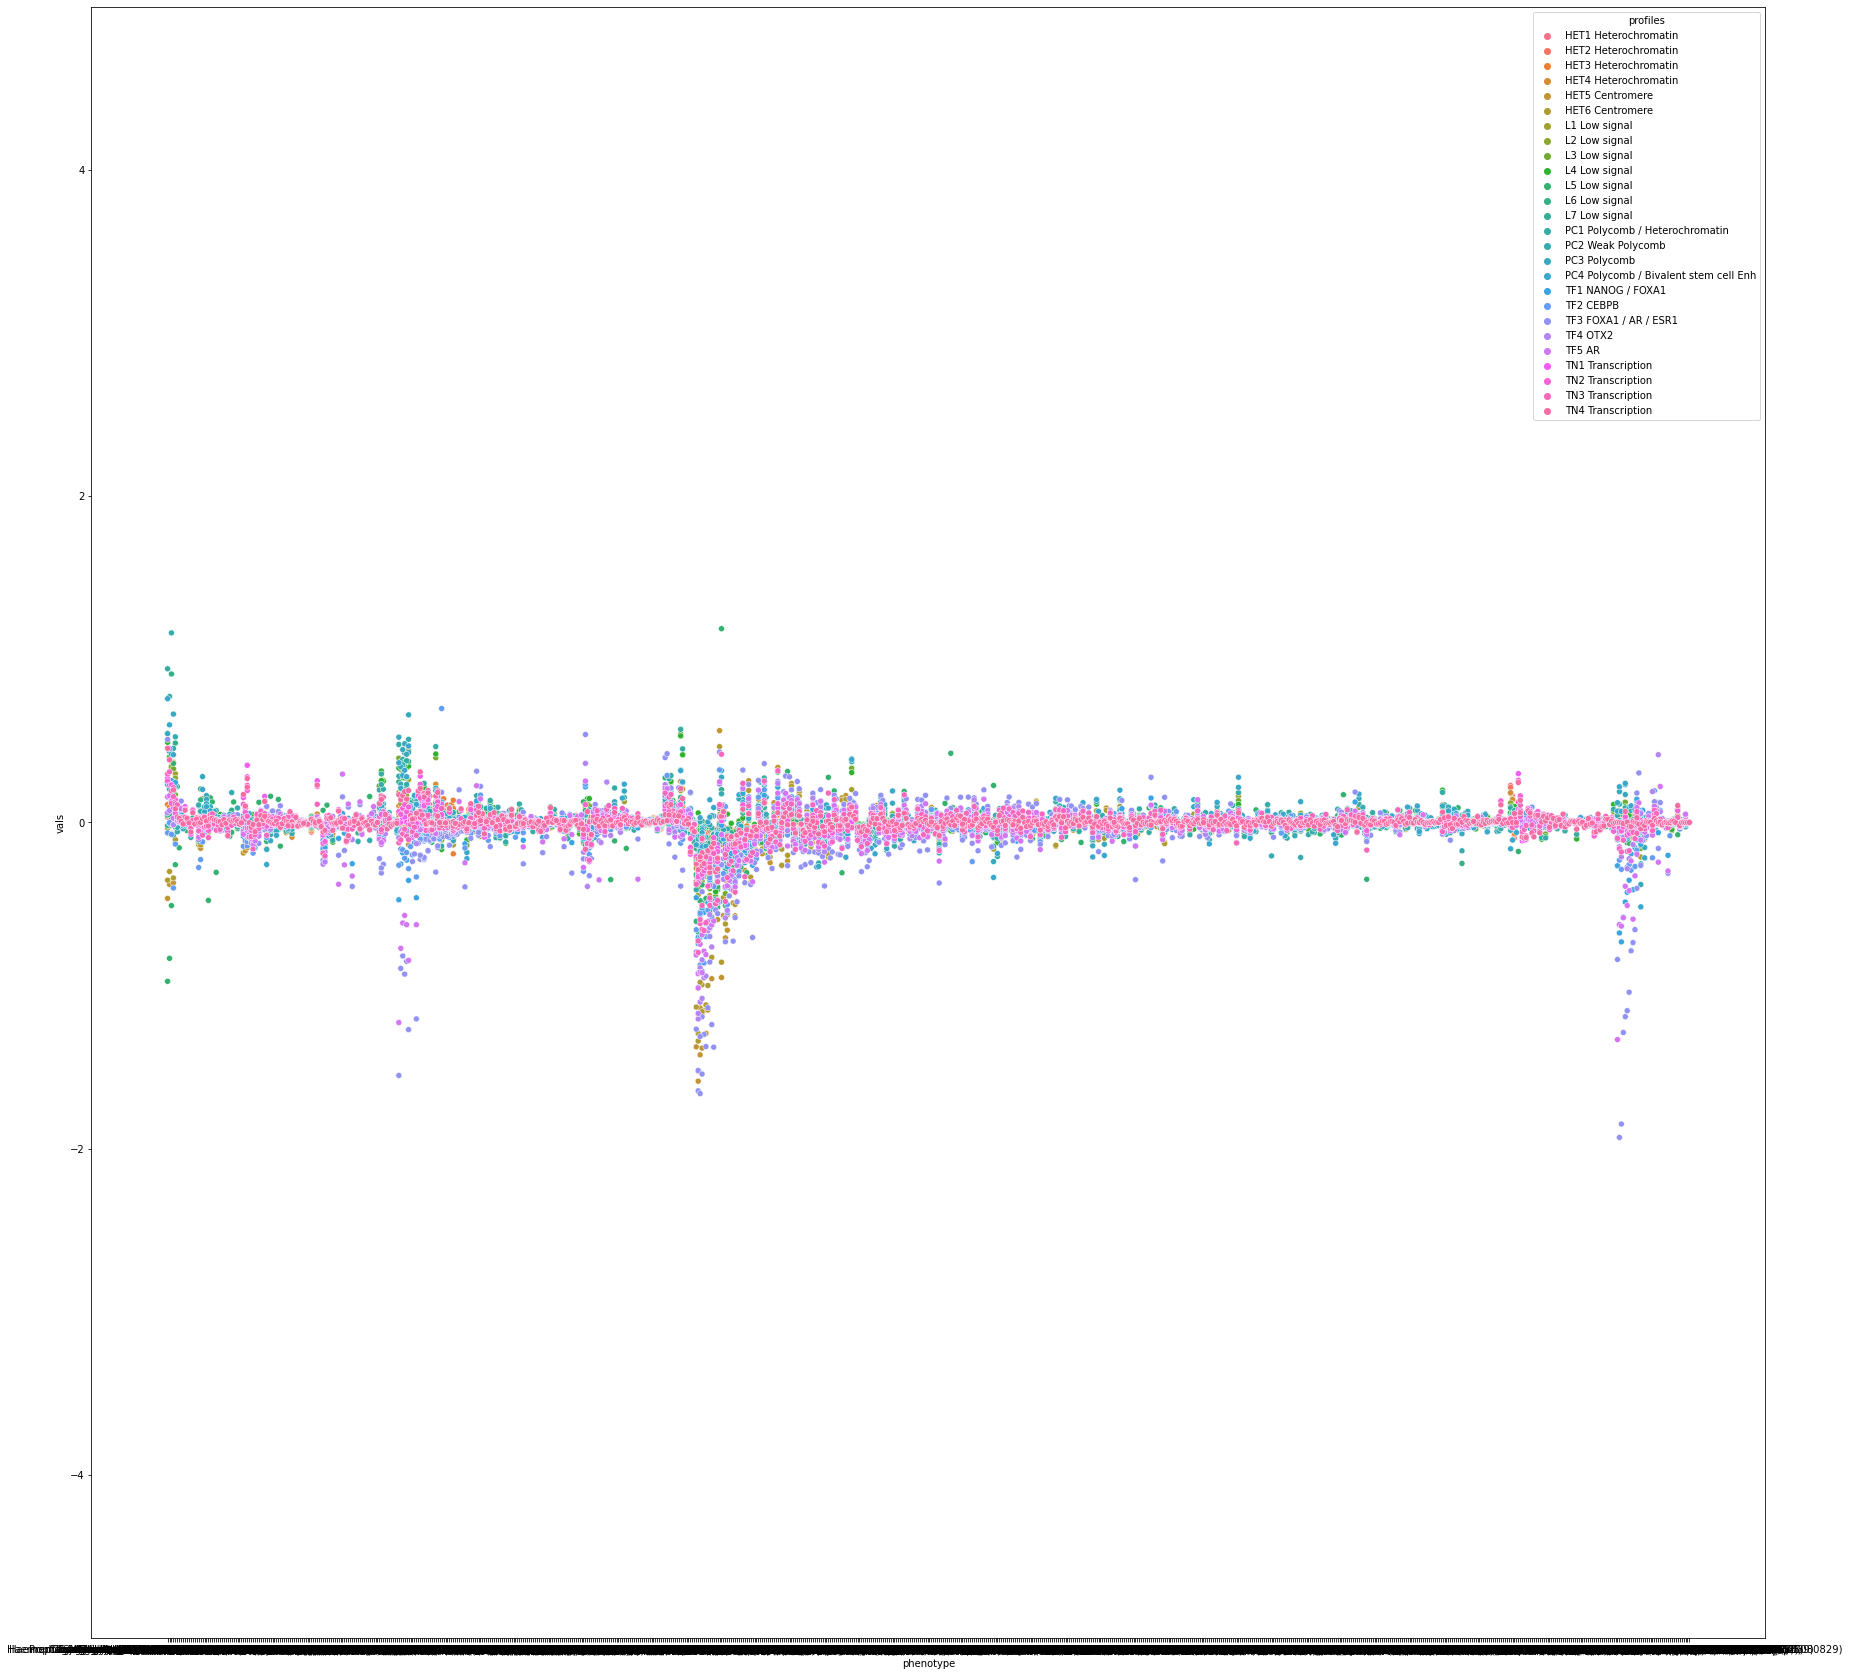

In [5]:
# Scatter Plot with remaining sequence classes
others_df = pd.read_csv('other.csv', index_col = 0)
others_df2 = others_df.dropna()
plt.figure(figsize=(30,30))
h = sb.scatterplot(data = others_df2, x = "phenotype", y = "vals", hue = 'profiles')
h.set(ylim = (-5, 5))